# The diffusion equation
Numerical solution of the 1D diffusion problem
$$ \frac{\partial N}{\partial t} =  k \frac{\partial^2 N}{\partial x^2}$$ 
using an explicit scheme

$N(x,t)$ represents the evolution of the dissolved nitrogen (DIN) concentration along the estuary over time

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
# constants
SECPERDAY = 86400.
M2KM = 1000

## User defined parameters

In [2]:
# problem parameters
kappa=1.0e3   # Eddy diffusion coefficient [m2 s-1]
dx=500         # X resolution [m]
dt=100         # time step [s]
t0=0.          # initial time
tmax=0.12      # duration of simulation [days]
xmax=10.0e3    # length of the basin [m]

# Parameters of the initial DIN spillage
N0 = 20.       # baseline concentration [mmol/m3]
sigma = 1000.  # width [m]
A = 100.       # amplitude [mmol/m3]

## Initial function and grid specifications
The initial shape of the temperature distribution is a Gaussian peak function

In [3]:
# Spatial shape of the initial DIN concentration
def Gaussian(x):
    y = N0+A*np.exp(-(x/sigma)**2)
    return y

The resulting space-time grid depends on the parameters above. The non-dimensional Courant number must be smaller than 0.5 for conditional stability.

In [4]:
# time axis
NT = int(np.floor(tmax*86400/dt))+1  # number of steps (starts from 0)
# X axis (centred at 0)
x = np.arange(-xmax,xmax,dx)
IM = len(x)             # number of grid points
N = np.zeros([IM,NT])   # the array holding the numerical solution 
print('Grid steps : ',IM)
print('Number of time steps : ',NT)
print('Timestep = ',dt,' s')
print('Max numerical diffusion DX^2/DT = ',dx**2/dt,' m2/s')
print('Physical diffusion = ',kappa,' m2/s')
print('Courant number (diffusion) = ',kappa*dt/(dx**2))

Grid steps :  40
Number of time steps :  104
Timestep =  100  s
Max numerical diffusion DX^2/DT =  2500.0  m2/s
Physical diffusion =  1000.0  m2/s
Courant number (diffusion) =  0.4


## Numerical solution
Note that this code stores the solution at all times in array N for educational purposes. This allows to plot the solution at the different time steps and see how it evolves.

*This method is very inefficient for any application because it uses a lot of memory. In modern computer codes only a few time records are hold in memory. The instantaneous solution is often temporarely stored for computing time averages and then discarded.*

This part of the code is the topic of one question found in the lecture notes

In [5]:
# Compute the numerical solution using a time loop over the number of time steps
N[:,0] = Gaussian(x)    # initial condition

for n in range(NT-1):
    # Question 2
    N[0,n+1]  = N[1,n]
    N[-1,n+1] = N[-2,n]
    # discretization of the second derivative
    rhs = kappa*(N[:-2,n]-2*N[1:-1,n]+N[2:,n])/(dx**2)
    N[1:-1,n+1] = N[1:-1,n] + rhs*dt    

## Plot the result using a matplotlib animation
The animation below displays the evolution of the solution and compares it with the initial condition

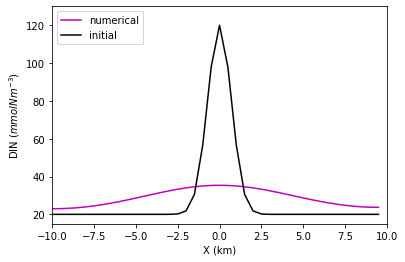

In [6]:
fig, ax = plt.subplots()
# set the axis limits
plt.axis([-xmax/M2KM, xmax/M2KM, N0-5, N0+A+10])
# first plot the initial condition and set the line attributes
sol, = ax.plot(x/M2KM, N[:,0],'m',label='numerical')
line, = ax.plot(x/M2KM, Gaussian(x),'k',label='initial')
ax.set_xlabel('X (km)')
ax.set_ylabel('DIN ($mmol N m^{-3}$)')
plt.legend(loc='upper left')

def animate(i):
    sol.set_ydata(N[:,i])  # update the numerical solution
    return sol,

# create the animation and loop (interval is in ms)
ani = animation.FuncAnimation(
    fig, animate, interval=dt, blit=True, frames=NT, repeat=True)

# display the animation as a javascript object embedded in the notebook
from IPython.display import HTML
HTML(ani.to_jshtml())